# import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle 
import json
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro, kendalltau, pearsonr
from phik import resources
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer



load data and manipulating

In [2]:
# load data
df_ori = pd.read_csv('humanitarian-aid.csv')

# copying data original
df = df_ori.copy()

# showing copied data
df

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.columns

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

# EDA

Sebuah lembaga LSM berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan dana sekitar $ 10 juta. CEO LSM tersebut perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini adalah terkait dengan pemilihan negara mana yang paling membutuhkan bantuan.

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara tersebut. **Nyatakan secara jelas negara mana yang Anda rekomendasikan kepada sang CEO di bagian Kesimpulan.**

Text(0.5, 1.0, 'Histogram of GDPP')

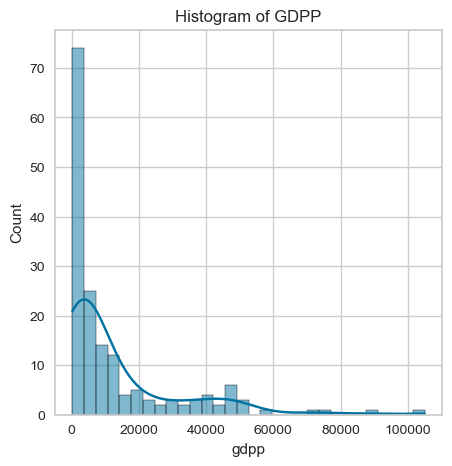

In [7]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.histplot(df.gdpp, kde=True, bins=30)
plt.title('Histogram of GDPP')

Output di atas menunjukkan beberapa data yaitu:
1. grafik skewed ke kanan, menunjukkan GDPP mayoritas negara rendah (0-20000), hanya sedikit negara yang memiliki GDPP tinggi.  
2. ditemukan beberapa negara dengan GDPP >40000 namun hanya sedikit.  
3. data tidak berdistribusi normal.

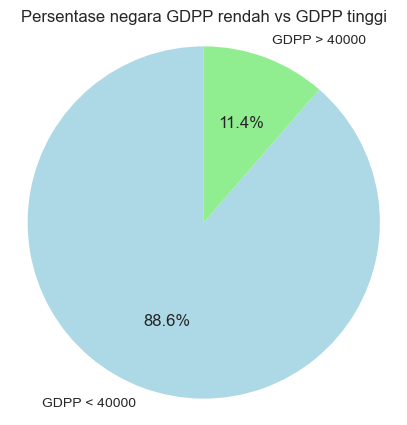

In [8]:
#filtering country with low GDPP
low_gdpp = df[df['gdpp']<40000]

#filtering country with high GDPP
high_gdpp = df[df['gdpp']>=40000]

#creating size and title for pie chart
labels = ['GDPP < 40000', 'GDPP > 40000']
size = [len(low_gdpp), len(high_gdpp)]

#create pie chart
plt.figure(figsize=(5,5)) #size chart
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue','lightgreen'])
plt.axis('equal')

#Showing pie chart
plt.title('Persentase negara GDPP rendah vs GDPP tinggi')
plt.show()

Chart di atas menunjukkan perbandingan yang lebih nyata antara negara dengan GDPP rendah yaitu sebesar 11,4% dari total seluruh data. Negara-negara yang termasuk ke dalam 11,4% tersebut bisa dijadikan prioritas penerima bantuan.

melihat keterkaitan antara child_mortality dan total_fertility

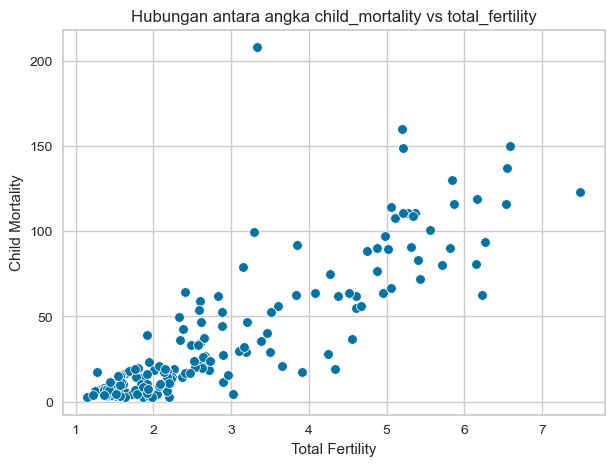

In [9]:
#size chart
plt.figure(figsize=(7,5))
sns.scatterplot(x='total_fertility', y='child_mortality', data=df)

#chart title and labels
plt.title('Hubungan antara angka child_mortality vs total_fertility')
plt.xlabel('Total Fertility')
plt.ylabel('Child Mortality')

#showing chart
plt.show() 

hasil visualisasi di atas menunjukkan bahwa:  
1. Total Fertility dan Child Mortality memiliki hubungan berbanding lurus, dimana semakin tinggi angka kelahiran maka semakin tinggi pula angka kematian anak usia di bawah 5 tahun.  
2. Negara dengan tingkat kelahiran tinggi cenderung memiliki tingkat kematian anak usia di bawah 5 tahun yang tinggi pula.  
3. dilihat dari dua titik tejauh dari sumbu-x, diketahui bahwa dua titik tersebut mengindikasikan negara dengan kondisi kesehatan dan sosial ekonomi yang sangat buruk. 

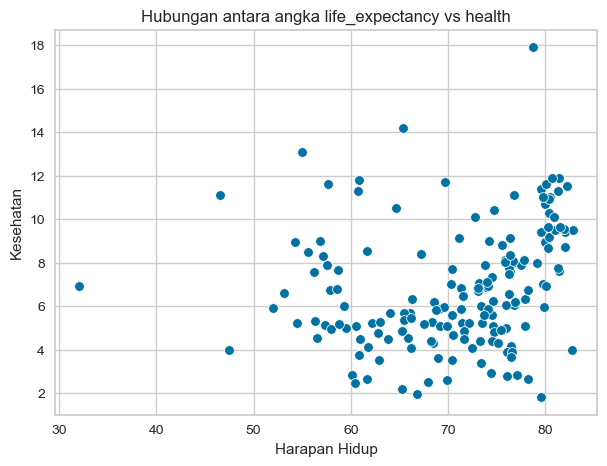

In [10]:
#size chart
plt.figure(figsize=(7,5))
sns.scatterplot(x='life_expectancy', y='health', data=df)

#chart title and labels
plt.title('Hubungan antara angka life_expectancy vs health')
plt.xlabel('Harapan Hidup')
plt.ylabel('Kesehatan')

#showing chart
plt.show() 

hasil visualisasi di atas menunjukkan bahwa:
1. terdapat korelasi dimana semakin tinggi alokasi GDPP pada bidang kesehatan, maka semakin tinggi pula angka harapan hidup di negara tersebut.
2. terdapat beberapa data yang perlu dianalisis lebih lanjut khususnya pada negara yang mengalokasikan GDPP <6% namun memiliki angka harapan hidup >70 tahun. 

In [11]:
df.head(3)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [12]:
df.columns

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

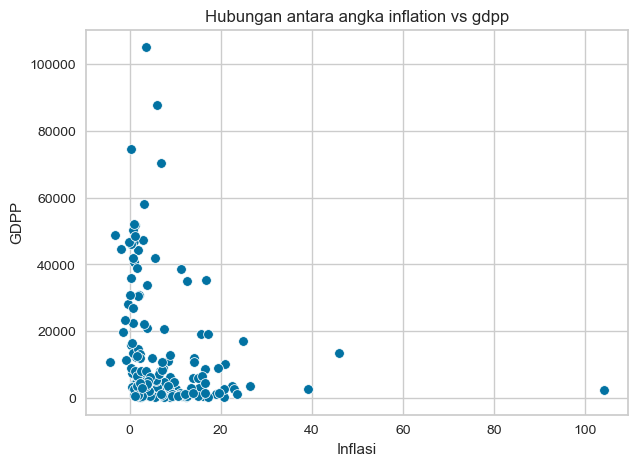

In [13]:
#size chart
plt.figure(figsize=(7,5))
sns.scatterplot(x='inflation', y='gdpp', data=df)

#chart title and labels
plt.title('Hubungan antara angka inflation vs gdpp')
plt.xlabel('Inflasi')
plt.ylabel('GDPP')

#showing chart
plt.show() 

Hasil visualisasi antara inflasi dengan gdpp adalah:
1. semakin tinggi inflasi maka semakin rendah GDPP suatu negara.
2. mayoritas negara dengan inflasi <20% memiliki memliki GDPP <40000
3. berfokus pada inflasi <20% menunjukkan bahwa inflasi yang rendah tidak lantas membuat negara dapat mengatur perekonomiannya dengan baik, ditunjukkan dengan hanya ada sedikit titik yang terletak pada area inlfasi <20% dengan GDPP >40000

# FE

kmeans cuma butuh numerikal, jd kita drop country

In [14]:
df = df.drop(columns=['country'])
df

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## cek normalitas 

disini aku belum tau kalo k means, yg dicek normalitas untuk handling outliersnya kolom gdpp aja atau seluruh kolom

jadi dicoba cek seluruh kolom aja

uji normalitasnya pake saphiro karena datanya dikit (under 5000)

In [15]:
# bikin list kosong buat nyimpen hasil interpretasi
results = []

# looping untuk kolom df after kategorikal di drop
for column in df.select_dtypes(include=['float64', 'int64']).columns: 
    stat, p_value = shapiro(df[column])

    # mengetahui nilai skew
    skewness = df[column].skew()

    # interpretasi hasil (<0.05 ga normal)
    if p_value > 0.05:
        interpretasi = 'Normal'
    else:
        interpretasi = 'Tidak Normal'

    # masukin hasil ke list
    results.append([column, stat, p_value, skewness, interpretasi])

# masukin hasil uji normalitas ke dataframe
normality = pd.DataFrame(results, columns=['Column', 'Saphiro Stat', 'p-value','skewness', 'Interpretasi'])

normality

,Column,Saphiro Stat,p-value,skewness,Interpretasi
0,child_mortality,0.811947,2.165134e-13,1.450774,Tidak Normal
1,exports,0.813753,2.546082e-13,2.445824,Tidak Normal
2,health,0.964136,2.628207e-04,0.705746,Tidak Normal
3,imports,0.868810,6.639577e-11,1.905276,Tidak Normal
4,income,0.771261,7.280748e-15,2.231480,Tidak Normal
5,inflation,0.616314,3.640728e-19,5.154049,Tidak Normal
6,life_expectancy,0.926400,1.643109e-07,-0.970996,Tidak Normal
7,total_fertility,0.872212,9.826097e-11,0.967092,Tidak Normal
8,gdpp,0.696474,3.834858e-17,2.218051,Tidak Normal


hasil data di atas menunjukkan bahwa seluruh kolom distribusinya ga normal, nilai skewnya beda2. nentuin bb dan ba dgn ketentuan:  
1. yang nilai skew nya >1 dan <-1 IQR nya kali 3 karena ekstrem
2. yang nilai skewnya -1< skew <1 IQR nya kali 1.5 pake tukey's rule

In [16]:
# list buat nyimpen nama kolom, batas bawah, batas atas
column = []
batas_bawah = []
batas_atas = []

# loop setiap baris normality
for row in range(0,len(normality)):
    col = normality['Column'][row]
    skew = normality['skewness'][row]
    # hitung batas atas batas bawah untuk highly skew
    if skew > 1 or skew < -1:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        bb = df[col].quantile(0.25) - (IQR*3) #batas bawah
        ba = df[col].quantile(0.75) + (IQR*3) #batas atas
    else: #buat batas atas bawah moderate
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        bb = df[col].quantile(0.25) - (IQR*1.5) #batas bawah
        ba = df[col].quantile(0.75) + (IQR*1.5) #batas atas
    #masukin hasil ke list
    column.append(col)
    batas_bawah.append(bb)
    batas_atas.append(ba)

#masukin list ke dataframe
ba_bb = pd.DataFrame({
    'column':column,
    'batas_atas':batas_atas,
    'batas_bawah':batas_bawah
    })
ba_bb

,column,batas_atas,batas_bawah
0,child_mortality,223.6500,-153.3000
1,exports,134.0000,-58.8500
2,health,14.1200,-0.6000
3,imports,144.4000,-55.4500
4,income,81135.0000,-54980.0000
5,inflation,37.5700,-25.0100
6,life_expectancy,94.0500,48.0500
7,total_fertility,7.0075,-1.3325
8,gdpp,52210.0000,-36830.0000


next liat persentase outliers buat masing-masing kolom

In [17]:
# list buat nyimpen persentase outliers
percentage = []

#loop buat itung % outliers
for row in range(0, len(column)):
    col = column[row]

    # hitung persentase outliers dr batas atas dan batas bawah
    total_outlier = (
        (len(df[df[col] > batas_atas[row]]) / len(df) * 100) + 
        (len(df[df[col] < batas_bawah[row]]) / len(df) * 100)
    )

    # masukin hasil persentase ke percentage
    percentage.append(total_outlier)

#bikin dataframe buat persentase outliers
outliers = pd.DataFrame({
    'column':column,
    'persentase': [round(percent, 2) for percent in percentage]
})
outliers

,column,persentase
0,child_mortality,0.00
1,exports,1.80
2,health,1.20
3,imports,1.20
4,income,1.20
5,inflation,1.80
6,life_expectancy,1.80
7,total_fertility,0.60
8,gdpp,2.99


hasil output di atas menunjukkan bahwa di kolom child_mortality gak ada outliersnya meski datanya skewed. berarti gak usah handling outliers buat kolom child_mortality. handling outliersnya buat kolom lain aja.

## handling outliers

persentase outliersnya semua kurang dari 5%, dengan total rows yang sedikit yaitu 167, metode trimming outliers bukan hal yang tepat karena bisa mengurangi jumlah data. terlebih lagi ketika EDA kita tahu bahwa ada data outliers yang bisa diteliti lebih lanjut, maka outliersnya akan disensor (capping) aja  

kita coba capping manual instead of using windsorizing

In [18]:
# define fungsi buat capping dgn persentil 1 dan persentil 99
def capping(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)
    #kalo ada nilai yg dibawah lower capping, nilainya diganti pake nilai lower cap
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    #kalo ada nilai yg di atas upper capping, nilainya diganti jadi upper cap
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
    return df
# looping untuk capping setiap kolom yang punya outliers
for col in ['exports', 'health', 'imports', 'income', 'inflation', 'life_expectancy', 'total_fertility', 'gdpp']:
    df = capping(df, col)

harusnya ada handling missval dulu, tp disini gaada misval jd lgsg feature selection aja

## Feature Selection

sebelum memutuskan mana yang mau di pertahankan dan di drop, cek dulu korelasinya antar fitur

In [19]:
phik_matrix = df.phik_matrix()
phik_matrix

interval columns not set, guessing: ['child_mortality', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expectancy', 'total_fertility', 'gdpp']


,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
child_mortality,1.000000,0.123876,0.257487,0.000000,0.353677,0.346925,0.730631,0.699899,0.009841
exports,0.123876,1.000000,0.185749,0.741292,0.476552,0.098822,0.266407,0.195107,0.443703
health,0.257487,0.185749,1.000000,0.229333,0.599013,0.332325,0.564520,0.231848,0.565276
imports,0.000000,0.741292,0.229333,1.000000,0.390831,0.000000,0.411407,0.148869,0.214084
income,0.353677,0.476552,0.599013,0.390831,1.000000,0.172482,0.687332,0.491371,0.943645
inflation,0.346925,0.098822,0.332325,0.000000,0.172482,1.000000,0.361225,0.440166,0.232545
life_expectancy,0.730631,0.266407,0.564520,0.411407,0.687332,0.361225,1.000000,0.806756,0.616351
total_fertility,0.699899,0.195107,0.231848,0.148869,0.491371,0.440166,0.806756,1.000000,0.367971
gdpp,0.009841,0.443703,0.565276,0.214084,0.943645,0.232545,0.616351,0.367971,1.000000


hasil korelasi di atas menunjukkan:
1. income dan gdpp punya korelasi yang tinggi (hampir 1), yang di drop adalah gdpp karena konteksnya mau ngasih bantuan kan, berarti fokus ke kekayaan individu, sedangkan gdpp kan menggambarkan kekayaan suatu negara, jadi kurang pas.
2. life expectancy dan total fertility juga sama kaya poin nomor 1. yang di drop total fertility karena total fertility kurang mencerminkan kondisi kesehatan secara umum.
3. child mortality dan total fertility menunjukkan korelasi tinggi juga tp karena total fertility keputusannya d drop, jadi no prob.

keputusan final kolom yang dipertahankan:  
1. life expectancy (menggambarkan kesejahteraan umum suatu negara)
2. income (menggambarkan kekayaan individu)
3. child mortality (berkaitan dengan kesehatan anak-anak sebagai penerus suatu bangsa)
4. health (menunjukkan ketersediaan layanan kesehatan bagi masyarakatnya)
5. inflation (menggambarkan stabilitas ekonomi, berdampak pada tingkat kemiskinan, serta memiliki multikolinearitas yang rendah terhadap fitur lain)
6. import dan export meski memiliki korelasi yang tinggi, namun berkaitan dengan perputaran ekonomi.

In [20]:
#drop gdpp dan total_fertility
df = df.drop(columns=['gdpp', 'total_fertility'])
df

,child_mortality,exports,health,imports,income,inflation,life_expectancy
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2
1,16.6,28.0,6.55,48.6,9930.0,4.490,76.3
2,27.3,38.4,4.17,31.4,12900.0,16.100,76.5
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1
4,10.3,45.5,6.03,58.9,19100.0,1.440,76.8
...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.620,63.0
163,17.1,28.5,4.91,17.6,16500.0,41.478,75.4
164,23.3,72.0,6.84,80.2,4490.0,12.100,73.1
165,56.3,30.0,5.18,34.4,4480.0,23.600,67.5


## feature scaling

In [21]:
df.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,40.818376,6.787614,46.760096,16858.601677,7.397332,70.645269
std,40.328931,25.697471,2.642518,23.052216,17956.060832,7.770993,8.553975
min,2.600000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000
max,208.000000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000


hasil describe di atas menunjukkan terdapat perbedaan rentang nilai yang sangat jauh pada kolom chile mortality, income, inflation, dll. karena perbedaan tersebut, dilakukan scaling nilai agar nilai berada pada rentang yang sama.

bertujuan agar kinerja model baik khususnya pada K-means yang menghitung jarak antara 2 titik. 

scaling menggunakan minmaxscaler karena data skewed.

In [22]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df) #gabung aja, gak ada tes data, gak akan ada data leak

## PCA

setelah data di scaling, next lakukan PCA untuk reducing data

In [23]:
pca=PCA()
pca.fit(scaled_df)

PCA()

aku copas dari colab bagian ini sampai bagian berikutnya yang ditandai

Text(0, 0.5, 'Eigenvalues')

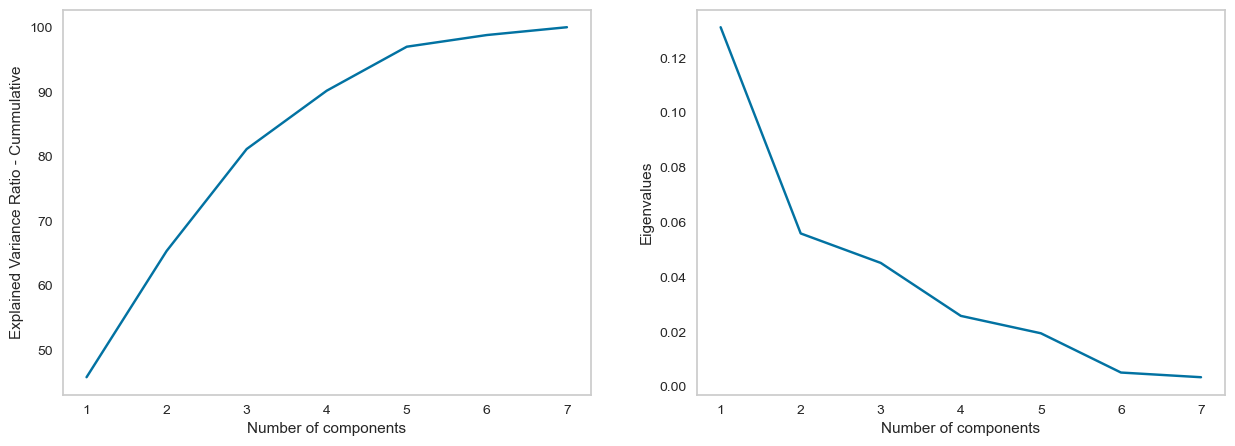

In [24]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 8), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 8), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [25]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

5

In [26]:
pca = PCA(n_components=0.95)
pca.fit(scaled_df)

scaled_pca = pca.transform(scaled_df)

## elbow method

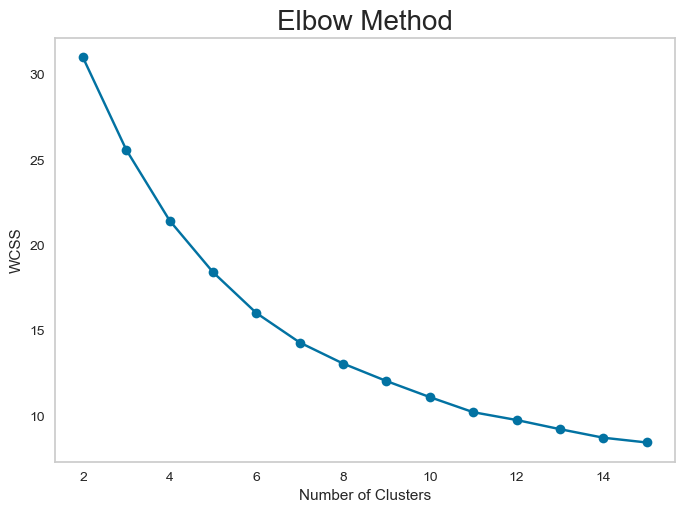

In [27]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## silhoutte plot

In [28]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.30025676409088314
For n_clusters = 3 The average silhouette_score is : 0.24161908997717246
For n_clusters = 4 The average silhouette_score is : 0.25700888921714726
For n_clusters = 5 The average silhouette_score is : 0.26539285360780435
For n_clusters = 6 The average silhouette_score is : 0.28976056591119576
For n_clusters = 7 The average silhouette_score is : 0.29936540793649924
For n_clusters = 8 The average silhouette_score is : 0.25533838836776795
For n_clusters = 9 The average silhouette_score is : 0.2470180947289998
For n_clusters = 10 The average silhouette_score is : 0.2533139675454253
For n_clusters = 11 The average silhouette_score is : 0.246215266635446
For n_clusters = 12 The average silhouette_score is : 0.24899176019618083
For n_clusters = 13 The average silhouette_score is : 0.2519746292872167
For n_clusters = 14 The average silhouette_score is : 0.2396279832361639


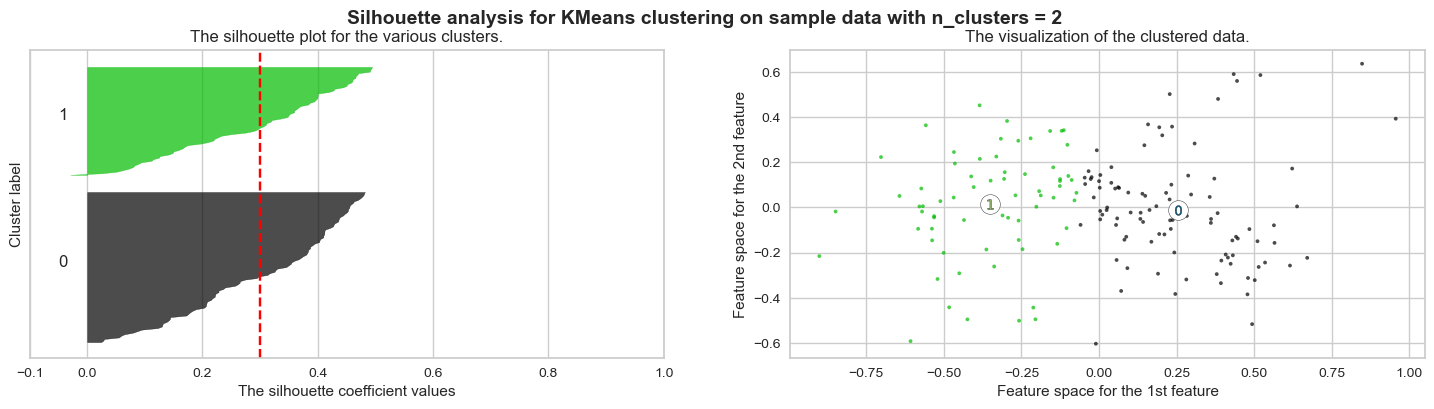

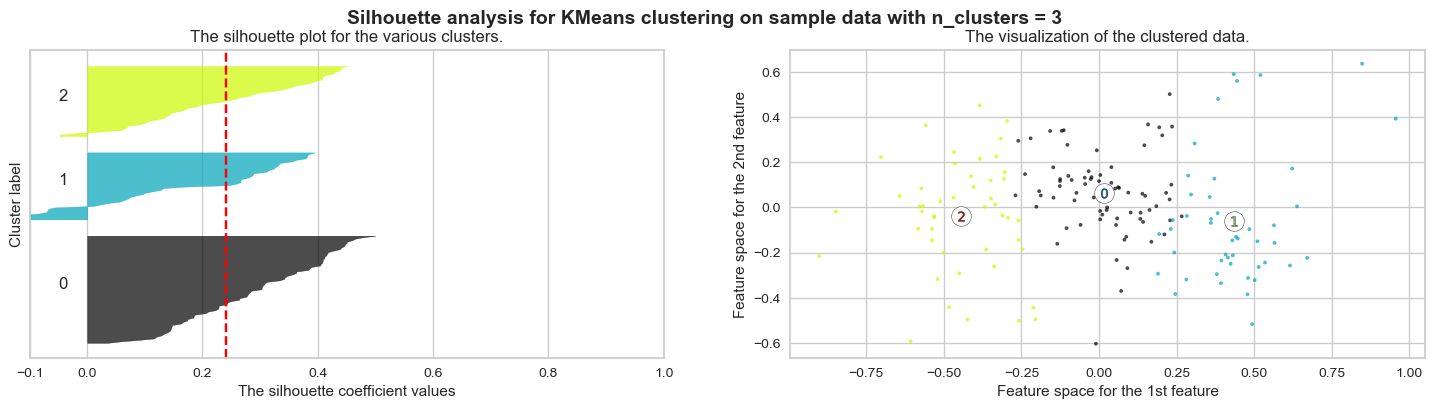

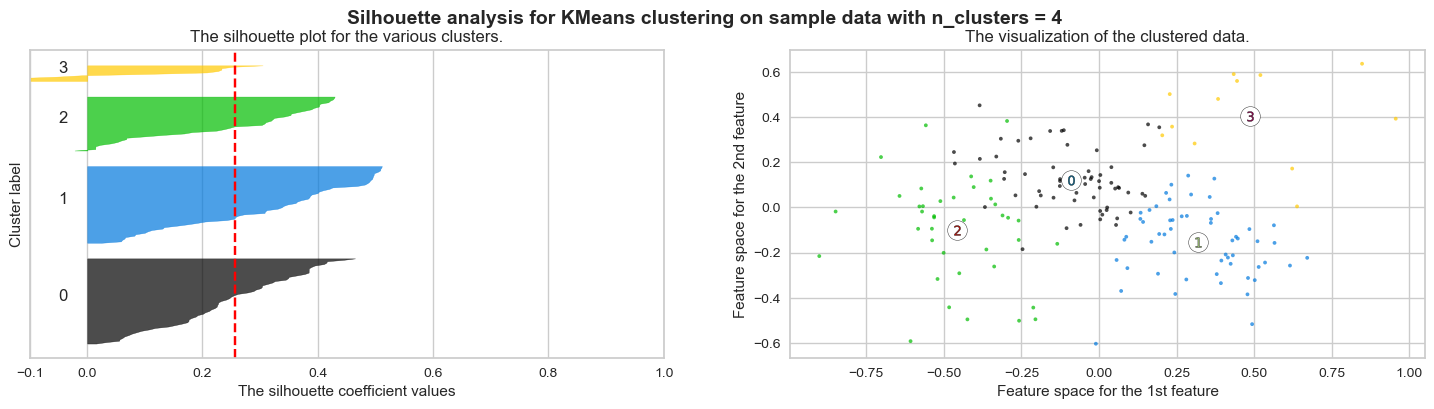

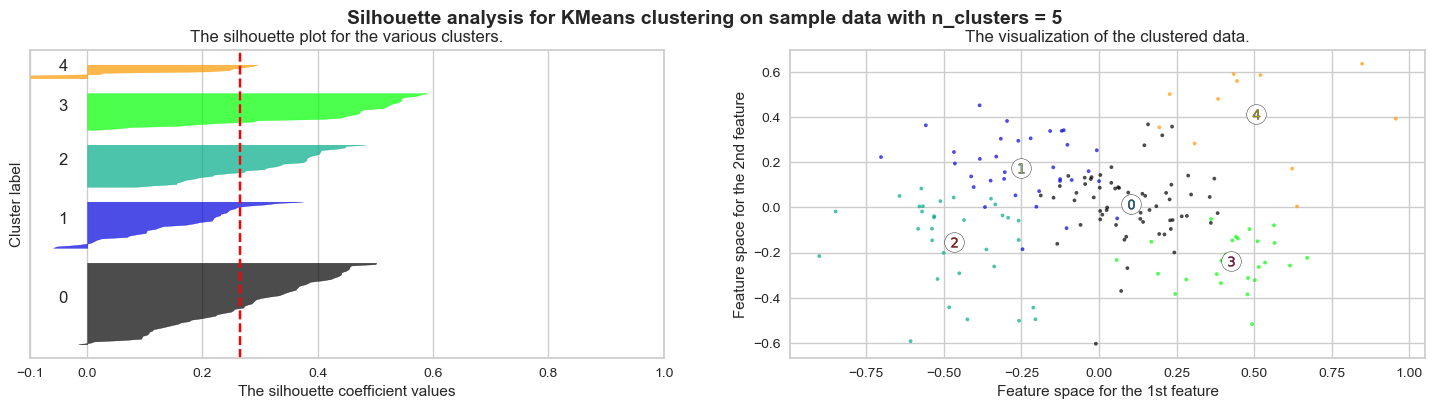

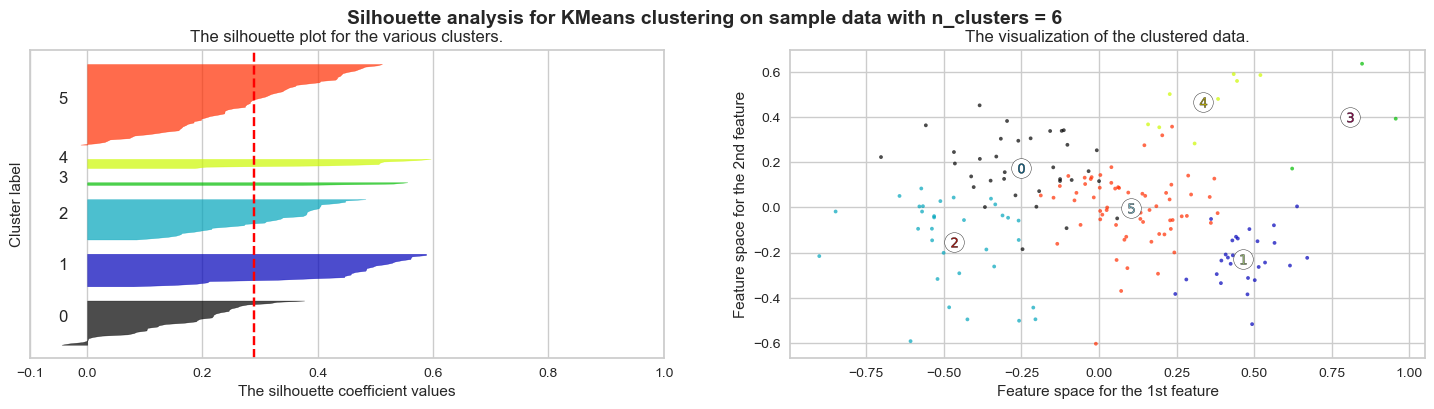

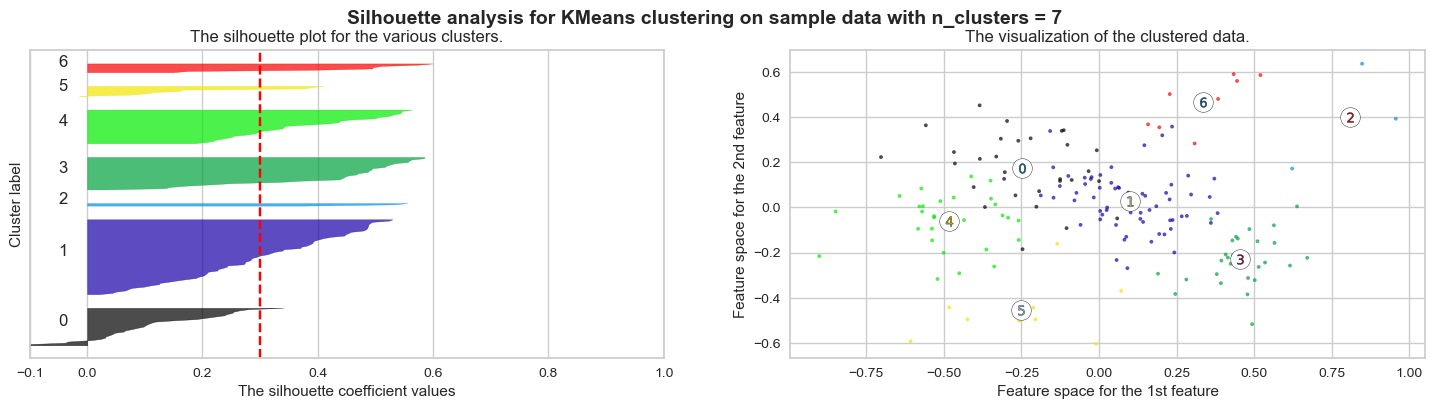

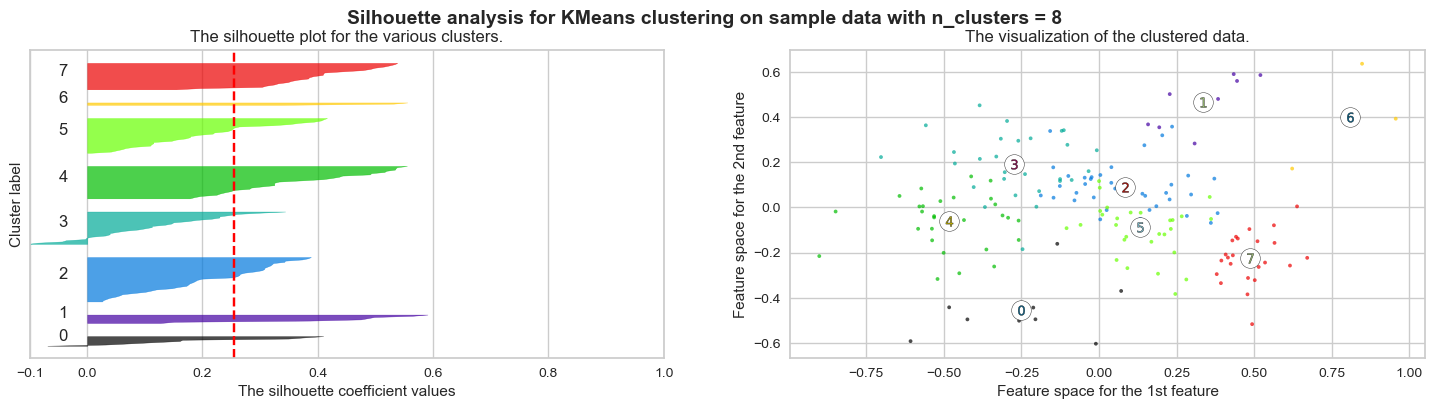

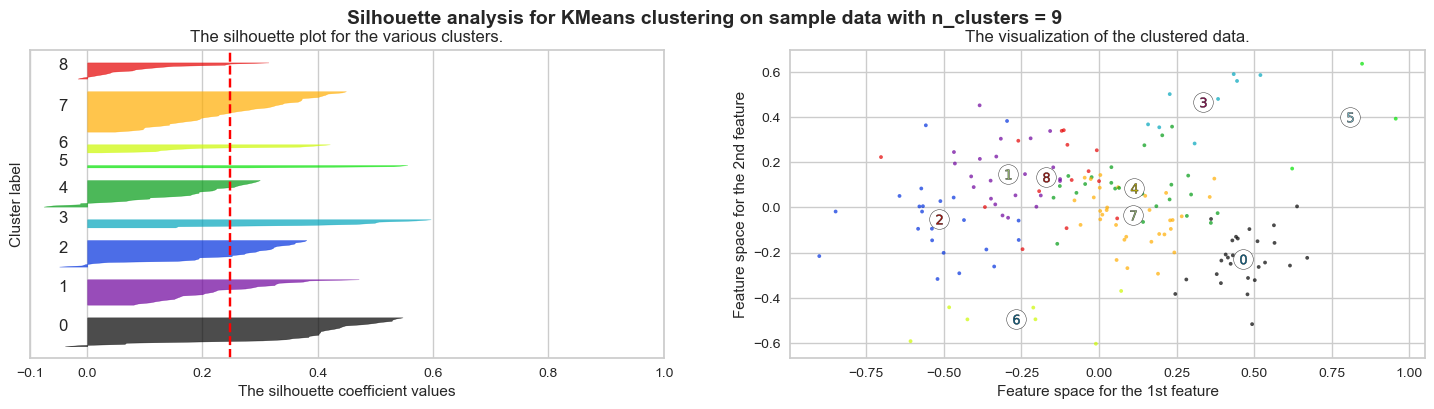

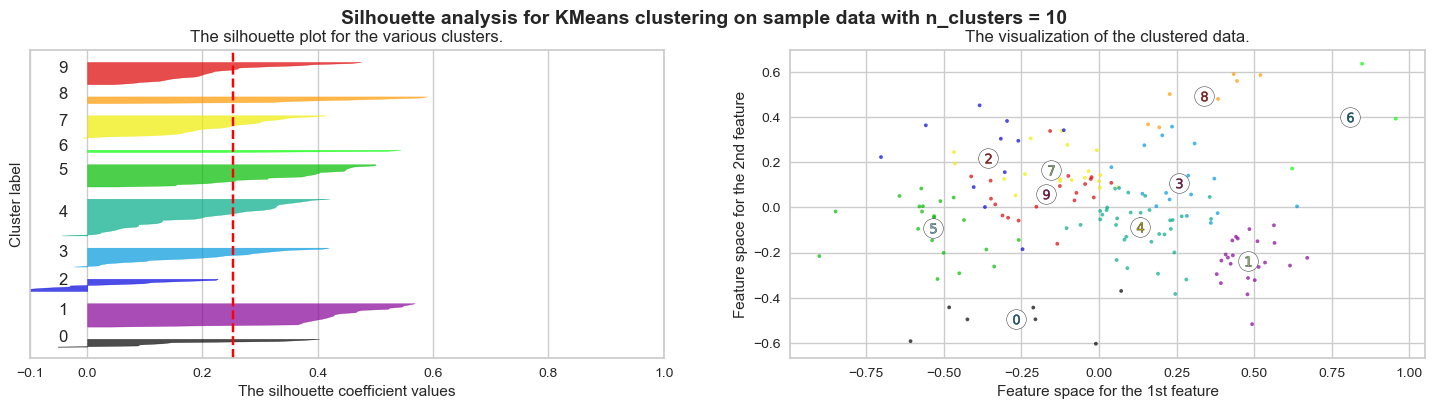

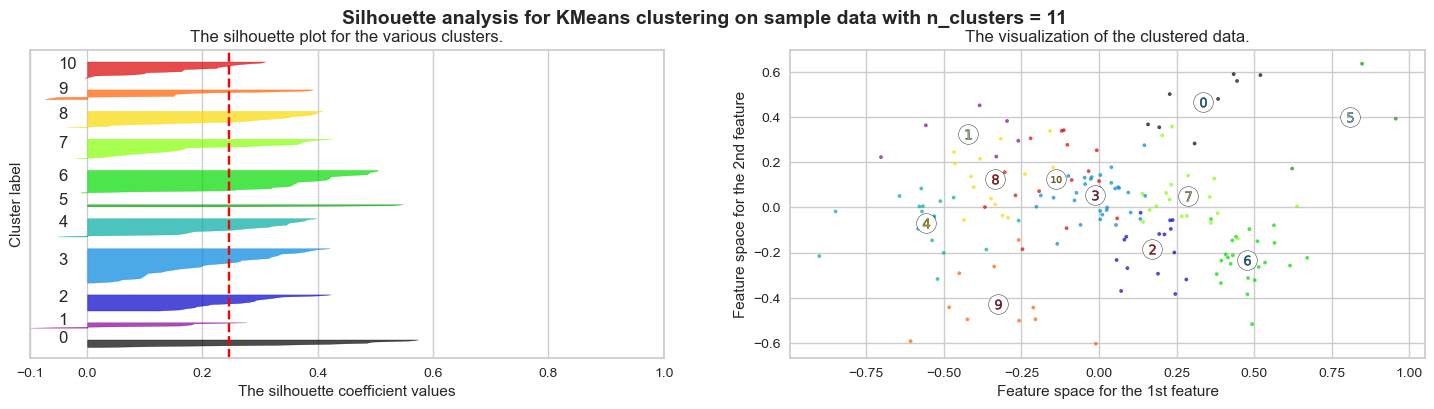

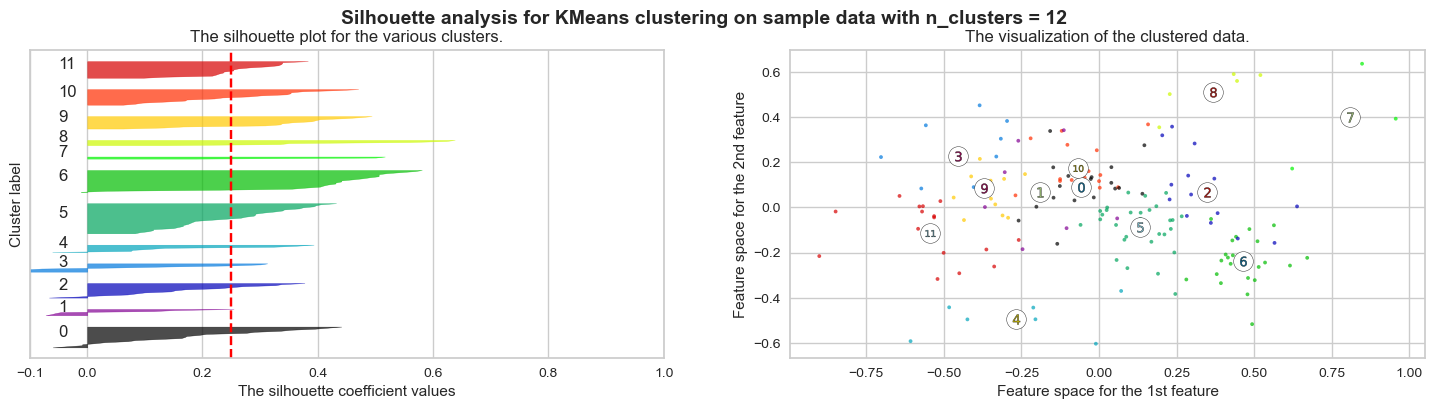

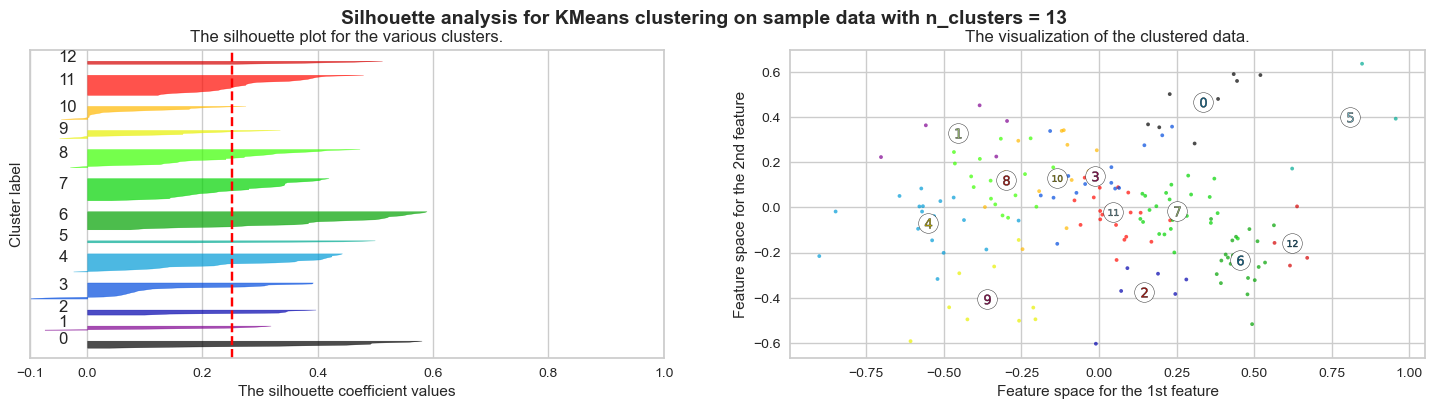

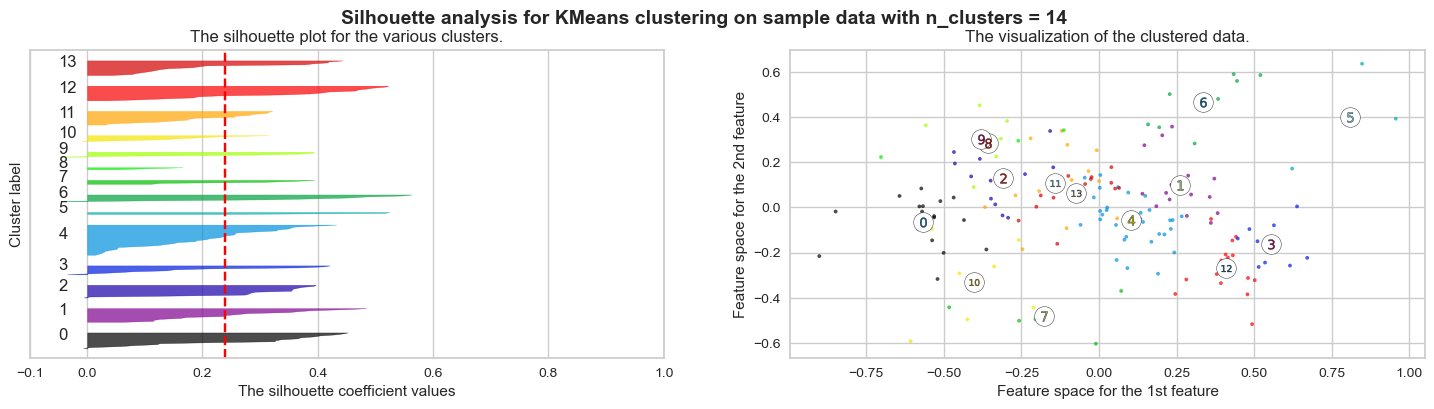

In [29]:
plot_silhouette(range(2, max_cluster), scaled_pca, random_state)

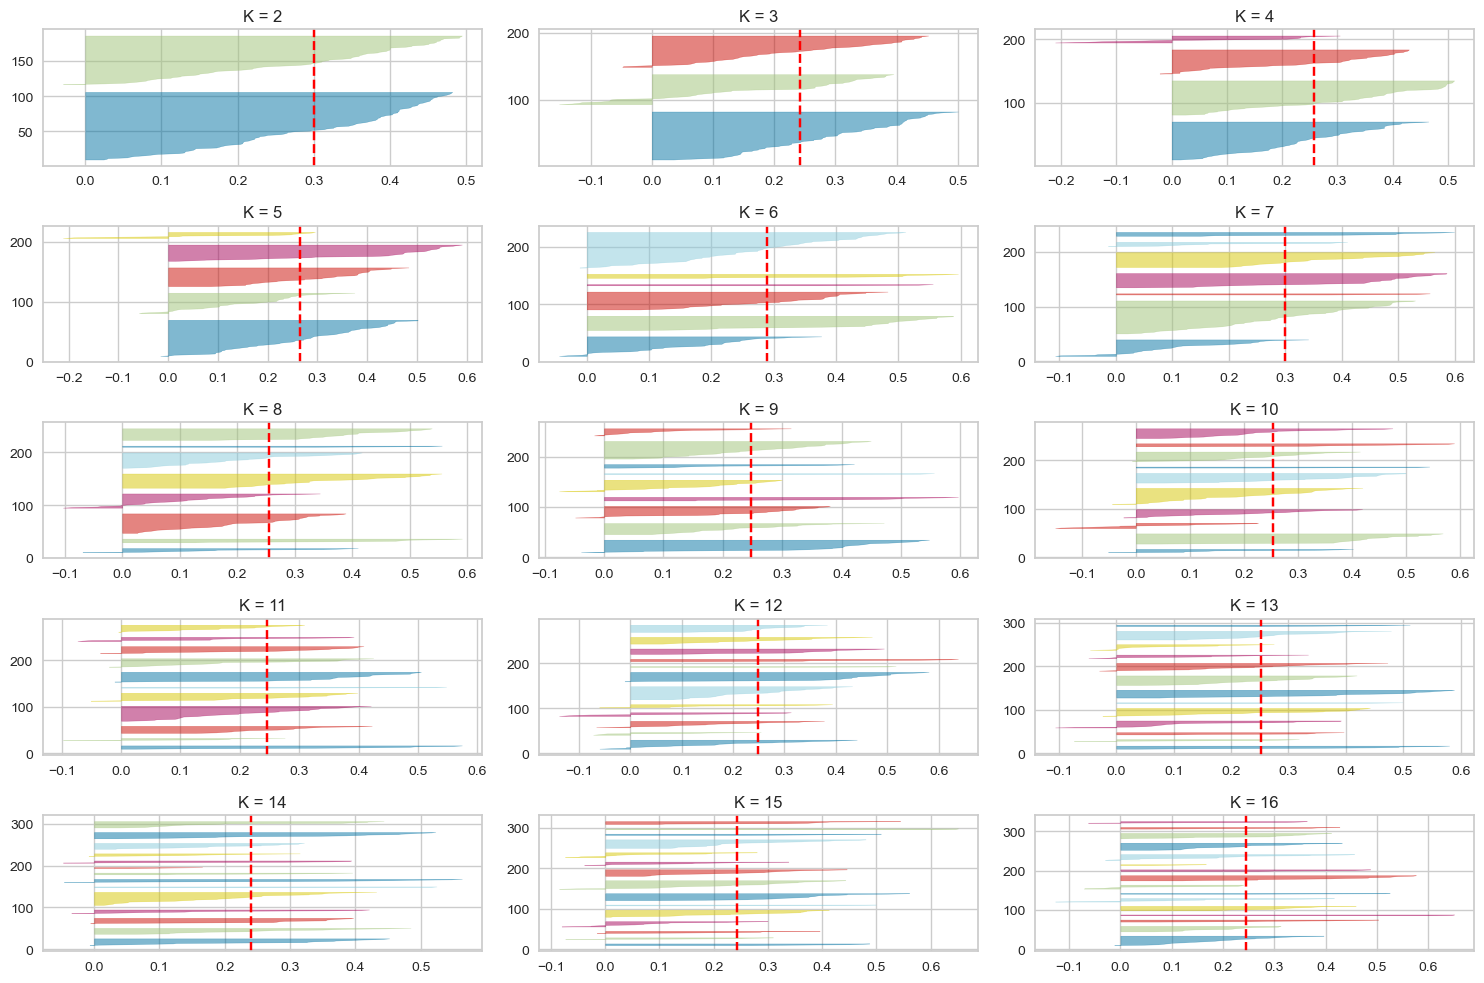

In [30]:
# Display the Silhouette Score and Plot Silhouette Plot

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(scaled_pca)
pred

array([2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 3, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2,
       1, 3, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2, 2, 3, 0, 2, 1, 1, 2,
       2, 0, 1, 3, 1, 2, 2, 3, 1, 2, 3, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 2, 0, 0, 2, 1, 3,
       2, 3, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2])

In [32]:
df_ori['cluster'] = pred
df_ori

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0
